# Analyzing the impact of the "Go To Travel" subsidy program on the increase in overall disease in Japan during the 2020 COVID-19 pandemic using linear regression

In [1]:
library(caret)
library(dplyr)
library(ggfortify)
library(ggplot2)
library(performance)
library(plotly)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [2]:
data <- read.csv("data.csv")

In [3]:
glimpse(data)
# Considering the virus incubation period, NewlyConfirmedCases data is a month behind of the Accommodation data.
# The NewlyConfirmedCases data is also scaled to x per 100,000 people living in the prefecture.

Rows: 282
Columns: 7
$ Prefecture               <chr> "Aichi", "Aichi", "Aichi", "Aichi", "Aichi", …
$ Date                     <chr> "2020-07-01", "2020-08-01", "2020-09-01", "20…
$ NewlyConfirmedCases      <dbl> 36.68586255, 11.00443293, 11.45521693, 50.779…
$ Guests_Total             <int> 802740, 851820, 939150, 1087590, 1142450, 100…
$ Guests_Prefecture        <int> 274460, 369790, 341500, 373750, 362450, 37355…
$ Guests_OutsidePrefecture <int> 473120, 413960, 538880, 646200, 702570, 54551…
$ Month                    <int> 7, 8, 9, 10, 11, 12, 7, 8, 9, 10, 11, 12, 7, …


In [4]:
data %>%
    select(-c("Prefecture", "Date")) -> data

In [5]:
summary(data)

 NewlyConfirmedCases  Guests_Total     Guests_Prefecture
 Min.   :  0.000     Min.   : 106820   Min.   :  20030  
 1st Qu.:  3.621     1st Qu.: 280028   1st Qu.:  66885  
 Median : 13.123     Median : 437275   Median : 109790  
 Mean   : 27.573     Mean   : 647199   Mean   : 199582  
 3rd Qu.: 35.046     3rd Qu.: 810970   3rd Qu.: 247830  
 Max.   :287.359     Max.   :3888860   Max.   :1593790  
 Guests_OutsidePrefecture     Month     
 Min.   :  74570          Min.   : 7.0  
 1st Qu.: 195282          1st Qu.: 8.0  
 Median : 301730          Median : 9.5  
 Mean   : 417684          Mean   : 9.5  
 3rd Qu.: 531498          3rd Qu.:11.0  
 Max.   :2090330          Max.   :12.0  

### Min-max Scaling

In [6]:
preproc <- preProcess(data, method = c("range"))
norm <- predict(preproc, data)

In [7]:
glimpse(norm)

Rows: 282
Columns: 5
$ NewlyConfirmedCases      <dbl> 0.1276656929, 0.0382950940, 0.0398638087, 0.1…
$ Guests_Total             <dbl> 0.18400652, 0.19698364, 0.22007435, 0.2593230…
$ Guests_Prefecture        <dbl> 0.16167014, 0.22224481, 0.20426876, 0.2247610…
$ Guests_OutsidePrefecture <dbl> 0.19771699, 0.16836826, 0.23033992, 0.2835803…
$ Month                    <dbl> 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 0.0, 0.2, 0.4, …


In [8]:
summary(norm)

 NewlyConfirmedCases  Guests_Total     Guests_Prefecture
 Min.   :0.00000     Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.01260     1st Qu.:0.04580   1st Qu.:0.02977  
 Median :0.04567     Median :0.08737   Median :0.05704  
 Mean   :0.09595     Mean   :0.14288   Mean   :0.11409  
 3rd Qu.:0.12196     3rd Qu.:0.18618   3rd Qu.:0.14475  
 Max.   :1.00000     Max.   :1.00000   Max.   :1.00000  
 Guests_OutsidePrefecture     Month    
 Min.   :0.00000          Min.   :0.0  
 1st Qu.:0.05988          1st Qu.:0.2  
 Median :0.11269          Median :0.5  
 Mean   :0.17022          Mean   :0.5  
 3rd Qu.:0.22668          3rd Qu.:0.8  
 Max.   :1.00000          Max.   :1.0  

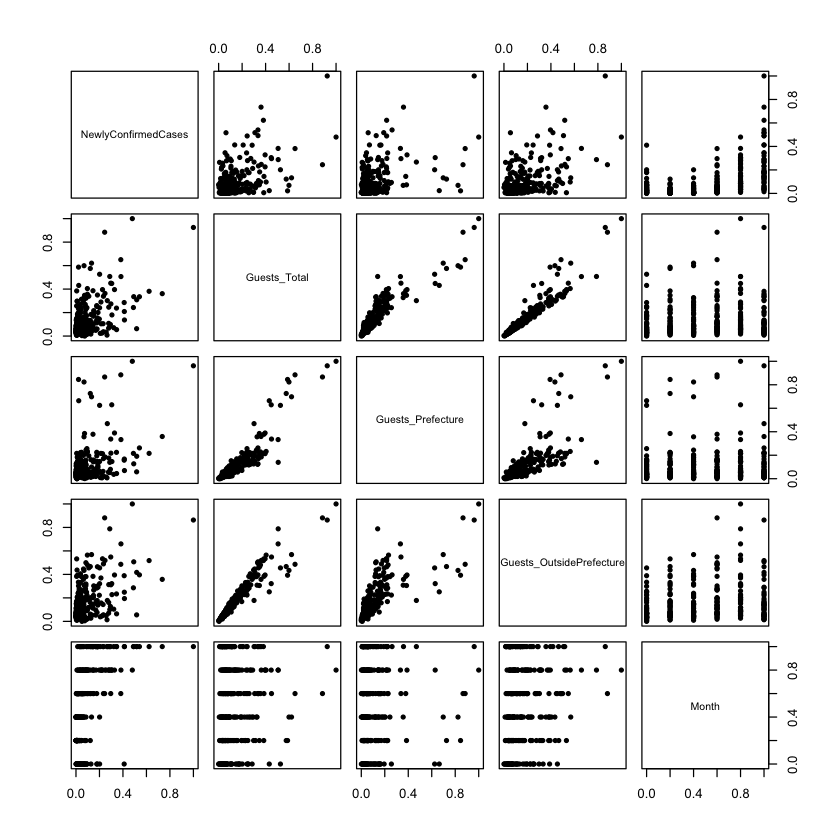

In [9]:
pairs(norm, pch = 20)

In [10]:
plot_ly(data = data, x = ~Guests_Total, y = ~NewlyConfirmedCases, type = 'scatter', mode = 'markers')

HTML widgets cannot be represented in plain text (need html)

`geom_smooth()` using formula 'y ~ x'



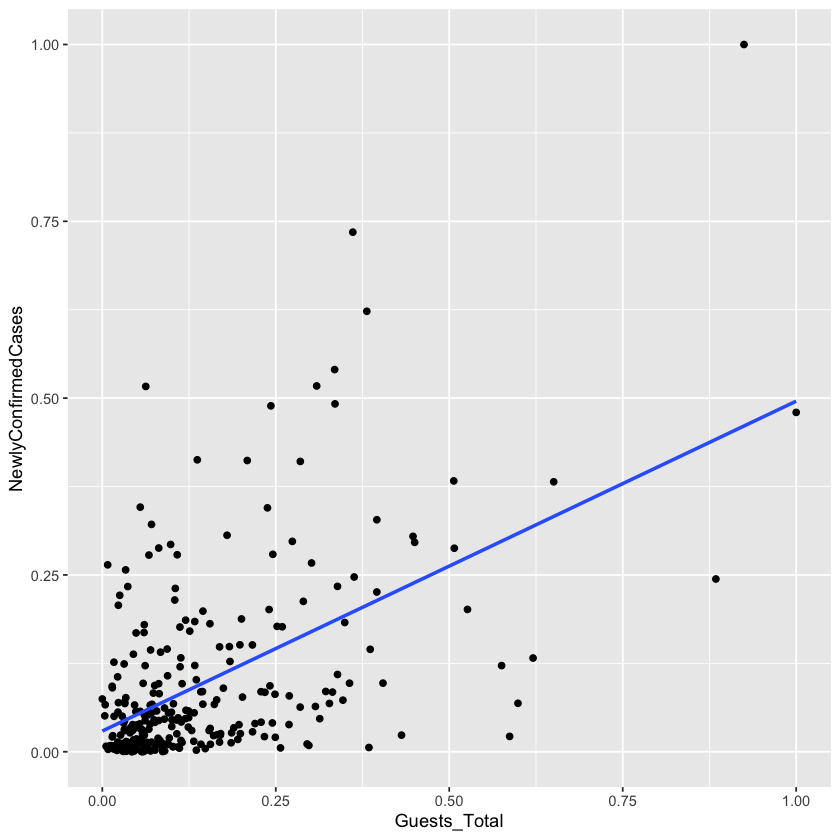

In [11]:
norm %>% ggplot(aes(x = Guests_Total, y = NewlyConfirmedCases)) +
    geom_point() +
    geom_smooth(method = 'lm', se = F)

`geom_smooth()` using formula 'y ~ x'



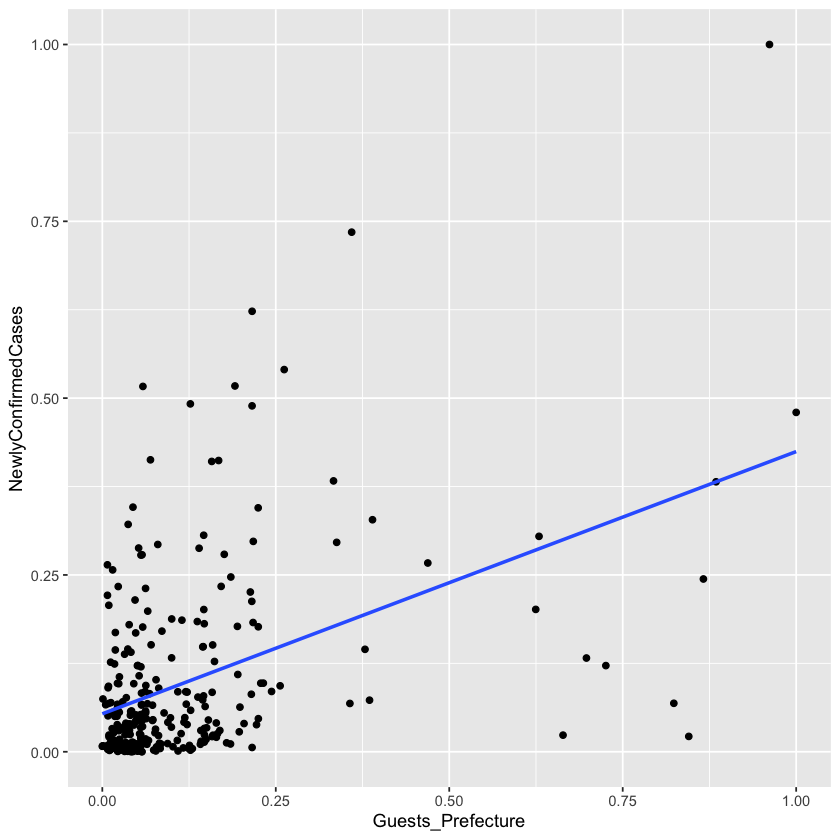

In [12]:
norm %>% ggplot(aes(x = Guests_Prefecture, y = NewlyConfirmedCases)) +
    geom_point() +
    geom_smooth(method = 'lm', se = F)

`geom_smooth()` using formula 'y ~ x'



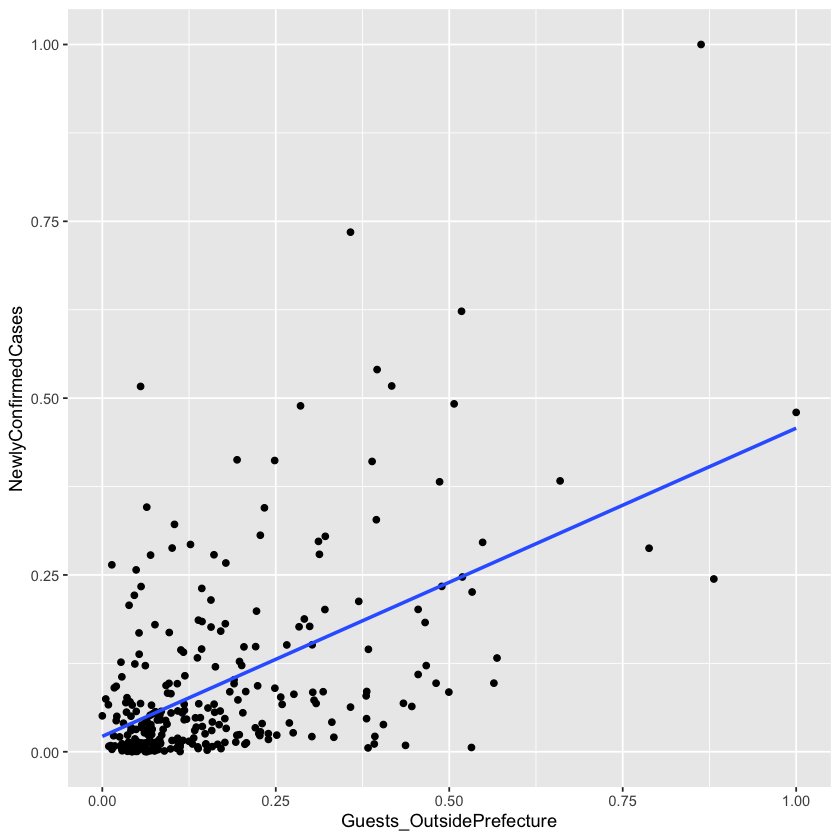

In [13]:
norm %>% ggplot(aes(x = Guests_OutsidePrefecture, y = NewlyConfirmedCases)) +
    geom_point() +
    geom_smooth(method = 'lm', se = F)

## Creating a Linear Regression Model

In [14]:
model <- lm(NewlyConfirmedCases ~ ., data = norm)

#### Normality test

In [15]:
shapiro.test(resid(model))


	Shapiro-Wilk normality test

data:  resid(model)
W = 0.89641, p-value = 5.663e-13


p-value = 5.663e-13, hence rejecting the null hypothesis (data normality)

#### Analyzing diagnostic plots

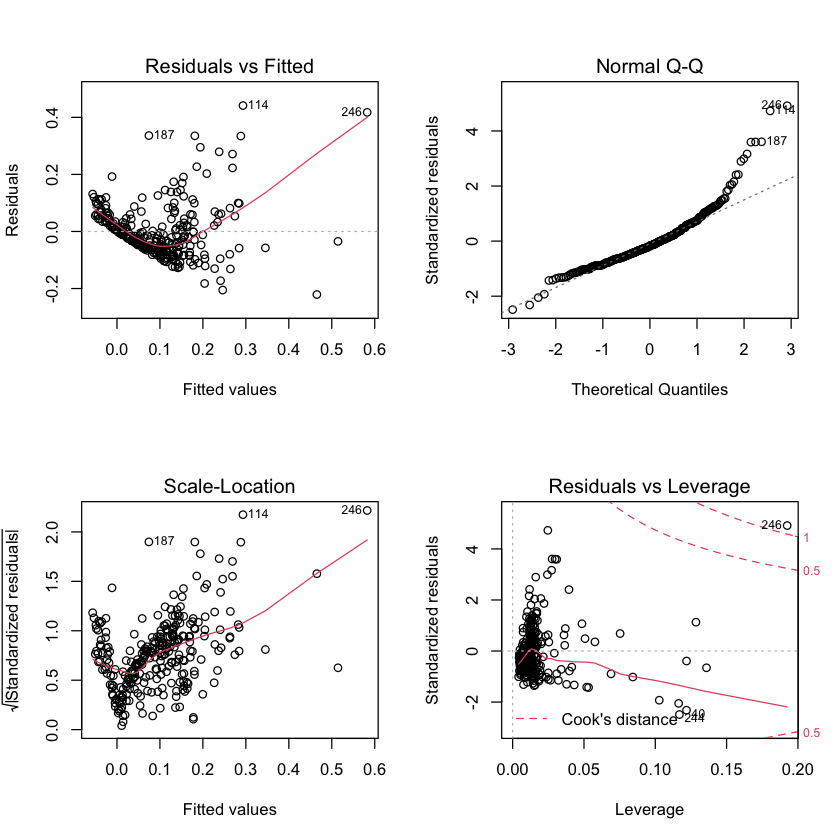

In [16]:
par(mfrow = c(2, 2))
plot(model)

Residuals vs Fitted: This plot shows if residuals have non-linear patterns. There is a non-linear relationship between predictor variables and an outcome variable and the pattern that shows up in this plot. <br />
Normal Q-Q: This plot shows if residuals are normally distributed. Most of the residuals are lined well on the straight dashed line. <br />
Scale-Location: This plot shows if residuals are spread equally along the ranges of predictors. The residuals are not equally and randomly spread. The red smooth line is not horizontal and shows a steep angle. <br />
Residuals vs Leverage: This plot helps find infulential cases. Most of the residuals appear clustered on the left. The case numbered 246 is beyond the Cook's distance lines.

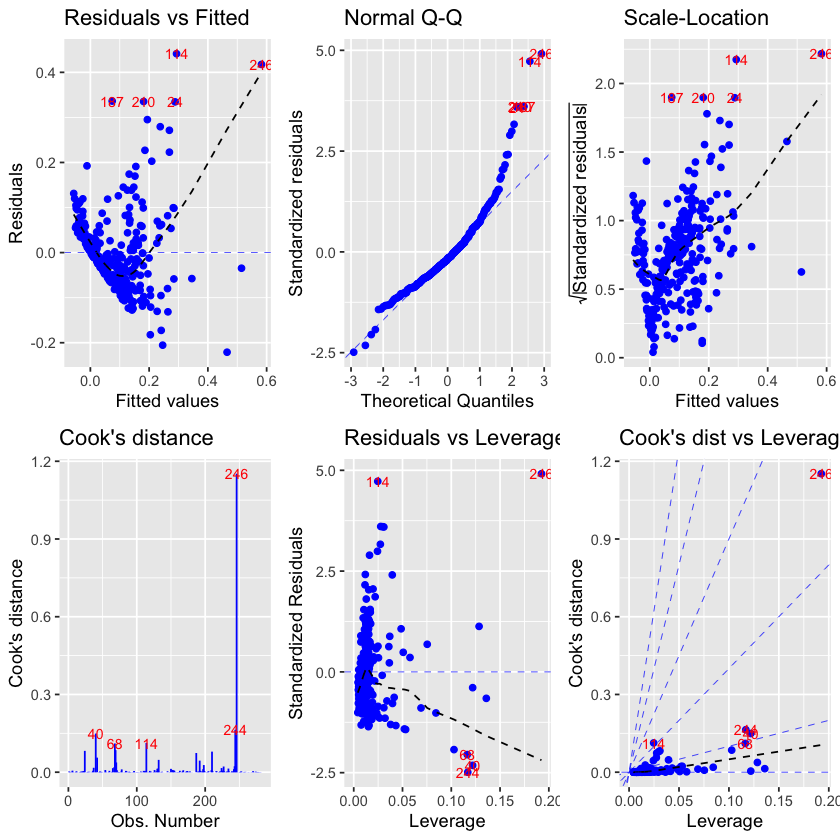

In [17]:
# a closer look at the Cook's distance
autoplot(model, which = 1:6, colour = 'blue',
         smooth.colour = 'black', smooth.linetype = 'dashed',
         ad.colour = 'blue',
         label.size = 3, label.n = 5, label.colour = 'red',
         ncol = 3)

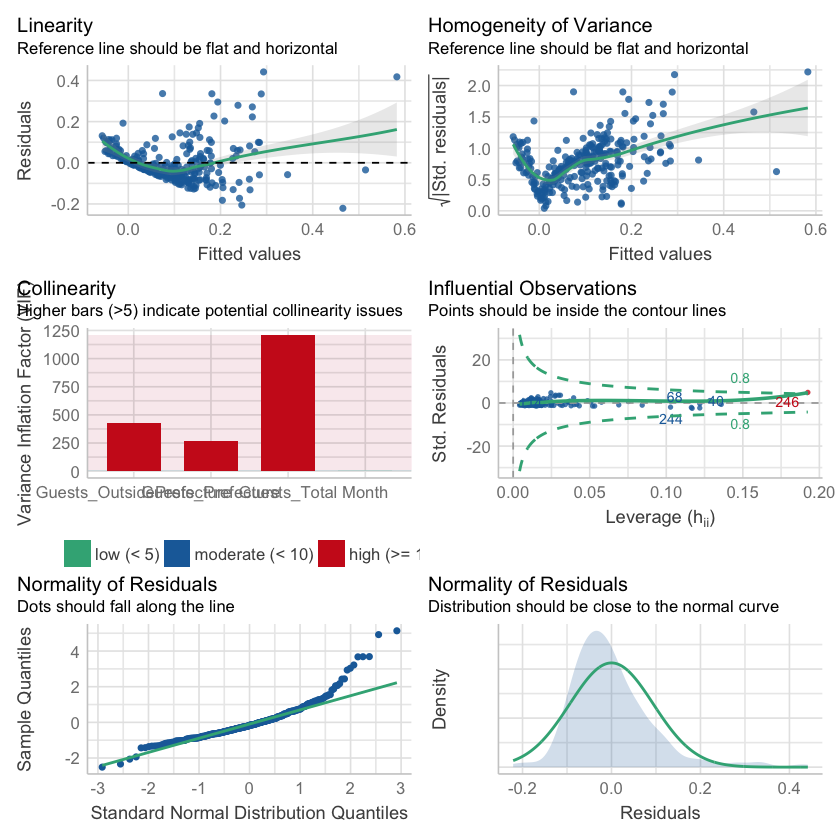

In [18]:
performance::check_model(model)

###### Residuals vs Fitted:

In [19]:
summary(model)


Call:
lm(formula = NewlyConfirmedCases ~ ., data = norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22102 -0.05924 -0.01589  0.04157  0.44135 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -0.04523    0.01130  -4.004 8.02e-05 ***
Guests_Total              4.01230    1.29993   3.087  0.00223 ** 
Guests_Prefecture        -1.61235    0.57994  -2.780  0.00581 ** 
Guests_OutsidePrefecture -1.98338    0.72407  -2.739  0.00656 ** 
Month                     0.17891    0.01691  10.582  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09452 on 277 degrees of freedom
Multiple R-squared:  0.5006,	Adjusted R-squared:  0.4934 
F-statistic: 69.42 on 4 and 277 DF,  p-value: < 2.2e-16


Adjusted R-squared = 0.4934 <br />
All of the columns are statistically significant. <br />
F-statistic result means that the regression model is better than the mean model.

In [20]:
quality_measures <- function(model, y){
    list(MAE = mean(abs(resid(model))),
    MAPE = mean(abs(resid(model)) / abs(norm$NewlyConfirmedCases)))
}

In [21]:
quality_measures(model, norm$NewlyConfirmedCases)

$MAE
[1] 0.06733323

$MAPE
[1] Inf

MAE = 0.067, which means that when using this model, we are wrong by 0.067 units <br />
MAPE = Inf, which means that it is not the right quality measure for this model (dividing by a zero value in NewlyConfirmedCases) <br />